DESICION TREE MODELİ İLE PLAYTENNIS  ÇALIŞMASI
========

In [1]:
import numpy as np
import joblib
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_validate, GridSearchCV,train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import sqlite3 as sql
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from matplotlib import pyplot as plt

In [2]:
#VERİ SETİNİ YÜKLEME
df=pd.read_csv("PlayTennis.csv")

In [3]:
#HEDEF DEĞİŞKENİ 1 VE 0'LARA ÇEVİRME
df['Play Tennis'] = df['Play Tennis'].replace({'Yes': 1, 'No': 0})

In [4]:
#BAĞIMSIZ DEĞİŞKENLERİ TANIMLAMA
bagimsiz_degisken = [col for col in df.columns if "Play Tennis" not in col]

In [5]:
#İHTİYAÇ DUYULAN FONKSİYONLARIN TANIMLANMASI

def df_kontrol(dataframe, head=5):
    """
    Veri setinin incelenmesine yönelik kolaylık sağlar. Veri setinde baştaki değerler, sondaki değerler, varsa boş değerlerin sayısı
    gibi özellikleri getirir.
    
     Parameters
    ------
        dataframe: dataframe
                incelenmek istenilen dataframe
        head: int
                veri setinin baş ve son değerlerini getirirken alınacak değer sayısıdır.
    """
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

def bagimsiz_degisken_ozellikleri(dataframe, bagimsiz_degisken, plot=False):
    """
    Veri setindeki bağımsız değişkenlerde bulunan değerlerin sayısını, bunun tüm veri setine oranını ve istenirse sayma grafiğini getirir.
    
    Parameters
    ------
        dataframe: dataframe
                bağımsız değişkenlerin alınacağı dataframe
        bagimsiz_degisken : str
                incelenecek değişkenler
        plot: boolean
                çıktının grafiği olacak mı olmayacak mı bilgisi
    """
    print(pd.DataFrame({bagimsiz_degisken: dataframe[bagimsiz_degisken].value_counts(),
                        "Ratio": 100 * dataframe[bagimsiz_degisken].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[bagimsiz_degisken], data=dataframe)
        plt.show(block=True)
        
def bagimsiz_degiskenin_hedef_degisken_analizi(dataframe, hedef, bagimsiz_degisken):
    """
    Bağımsız değişkenlerin hedef değişkene göre incelenmesine olanak sağlar.
    
    Parameters
    ------
        dataframe: dataframe
                bağımsız değişkenlerin alınacağı dataframe
        bagimsiz_degisken : str
                incelenecek değişkenler
        hedef: str
                hedef değişken
    
    """
    
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(bagimsiz_degisken)[hedef].mean()}), end="\n\n\n")
    
def tennis_data_prep(dataframe):
    """
    Veri setinin ilgili modele uygun hale getirilmesi için işlemler uygular. Label Encoding işleminin yapılabilmesi için LabelEncoder'ı
    tanımlar. Veri setindeki sütunlara Label Encoding işlemi uygular. Daha temiz bir görünüm için sütun isimlerini büyük harflerle yazar.
    Datayı X ve y olarak hedef değişkenin bulunduğu, bulunmadığı parçalara ayırır ve bunları ileriki aşamalarda kullanılabilir bir hale 
    getirir.
    
    Parameters
    ------
        dataframe: dataframe
                ilgili verilerin alınacağı dataframe
    
    """
    
    df = dataframe.copy()
    
    lb = LabelEncoder()

    df['Outlook'] = lb.fit_transform(df['Outlook']) 
    df['Temperature'] = lb.fit_transform(df['Temperature'] ) 
    df['Humidity'] = lb.fit_transform(df['Humidity'] ) 
    df['Wind'] = lb.fit_transform(df['Wind'] )   

    df.columns = [col.upper() for col in df.columns]

    y = df["PLAY TENNIS"]
    X = df.drop(["PLAY TENNIS"], axis=1)

    return X, y


In [6]:
#bagimsiz_degisken_ozellikleri FONKSİYONUNUN KULLANIMI
for col in bagimsiz_degisken:
    bagimsiz_degisken_ozellikleri(df,col)

          Outlook      Ratio
Sunny           5  35.714286
Rain            5  35.714286
Overcast        4  28.571429
##########################################
      Temperature      Ratio
Mild            6  42.857143
Hot             4  28.571429
Cool            4  28.571429
##########################################
        Humidity  Ratio
High           7   50.0
Normal         7   50.0
##########################################
        Wind      Ratio
Weak       8  57.142857
Strong     6  42.857143
##########################################


In [7]:
#bagimsiz_degiskenin_hedef_degisken_analizi FONKSİYONUNUN KULLANIMI
for col in bagimsiz_degisken:
    bagimsiz_degiskenin_hedef_degisken_analizi(df, "Play Tennis", col)

          TARGET_MEAN
Outlook              
Overcast          1.0
Rain              0.6
Sunny             0.4


             TARGET_MEAN
Temperature             
Cool            0.750000
Hot             0.500000
Mild            0.666667


          TARGET_MEAN
Humidity             
High         0.428571
Normal       0.857143


        TARGET_MEAN
Wind               
Strong         0.50
Weak           0.75




In [8]:
#tennis_data_prep fonksiyonu ile train ve test seti hazırlanması
X, y = tennis_data_prep(df)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [9]:
#DESICION TREE MODELININ GETİRİLİP, X_train VE y_train SETLERİNİN MODELE FİT EDİLMESİ
classifier = tree.DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5555555555555556, 0.875, 'X[0] <= 1.5\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.3333333333333333, 0.625, 'X[3] <= 0.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(0.2222222222222222, 0.375, 'X[0] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.7777777777777778, 0.625, 'X[2] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8888888888888888, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

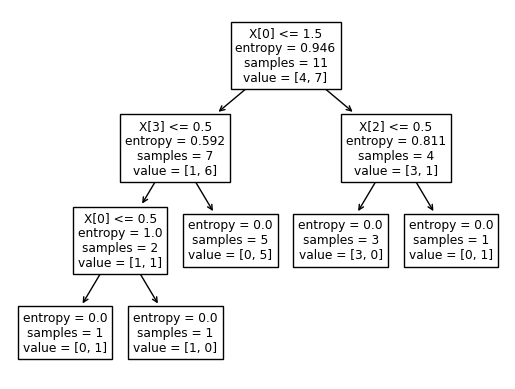

In [10]:
#MODELDEN ELDE ETTİĞİMİZ KARAR AĞACININ GÖRSELLEŞTİRİLMESİ
tree.plot_tree(classifier)

In [11]:
#TAHMİN TUTARLILIĞININ GETİRİLMESİ

X_pred1 = classifier.predict(X_train)
train_accuracy = (X_pred1 == y_train).mean()

X_pred2 = classifier.predict(X_test)
test_accuracy = (X_pred2 == y_test).mean()

print(f'Eğitim Seti Doğruluk Oranı : {train_accuracy}')
print(f'Test Seti Doğruluk Oranı : {test_accuracy}')

Eğitim Seti Doğruluk Oranı : 1.0
Test Seti Doğruluk Oranı : 1.0


In [12]:
#DATABASE OLUŞTURULMASI
con = sql.connect('tennis.db')

In [13]:
#DATABASE'DE TABLO OLUŞTURMAK İÇİN VERİ SETİNİN BİR DAHA ALINMASI
dff = pd.read_csv("PlayTennis.csv")
dff['Play Tennis'] = dff['Play Tennis'].replace({'Yes': 1, 'No': 0})

In [14]:
#MODELİN BU VERİ SETİNE UYGULANMASI
x, Y = tennis_data_prep(dff)
classifier.fit(x,Y)

DecisionTreeClassifier(criterion='entropy')

In [15]:
#GERÇEK DEĞERİYLE KARŞILAŞTIRMAK İÇİN TAHMİN DEĞERLERİNİN GETİRİLMESİ
Prediction = classifier.predict(x)
dff["Prediction"] = Prediction

In [16]:
#DFF VERİ SETİNİN TENNİS DATABASE'İNDE BİR TABLO HALİNE GETİRİLMESİ
dff.to_sql('Play_Tennis',con,index=False)

14